#  一、预测分析·商品评论情感预测
竞赛地址： [https://www.heywhale.com/home/competition/609cc718ca31cd0017835fdc/content/1](https://www.heywhale.com/home/competition/609cc718ca31cd0017835fdc/content/1)


## 1.背景
众所周知，大数据是企业的基本生产资料，数据信息是企业 宝贵的资产。不同于其他资产，数据资产主要在企业运营过程中 产生，较易获取，但要持续积累、沉淀和做好管理却并不容易， 这是一项长期且系统性的工程。未经“雕琢”的数据是一组无序、 混乱的数字，并不能给企业带来何种价值，从庞杂晦涩的数据中 挖掘出“宝藏”充满着挑战，这需要将业务、技术与管理三者相 互融合起来进行创新。

随着网上购物越来越流行，人们对于网上购物的需求变得越来越高，这让京东，淘宝等电商平台得到了很大的发展机遇。但是，这种需求也推动了更多的电商平台的发展，引发了激烈的竞争。在这种电商平台激烈竞争的大背景下，除了提高商品质量，压低商品价格外，了解更多的消费者心声对于电商平台来说也越来越重要。其中非常重要的一种方式就是针对消费者的购物行为数据和文本评论数据进行内在信息的数据挖掘分析。而得到这些信息，也有利于对应商品的生产自身竞争力的提高，以及为用户提供高质量感兴趣的商品。

## 2.数据简介
* 本数据集包括52 万件商品，1100 多个类目，142 万用户，720 万条评论/评分数据
* 本次练习赛所使用数据集基于JD的电商数据，来自WWW的JD.com E-Commerce Data，并且针对部分字段做出了一定的调整，所有的字段信息请以本练习赛提供的字段信息为准
* 评分为[1,5] 之间的整数

In [1]:
!pip install -U paddlenlp

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 491kB 13.7MB/s eta 0:00:01
  Found existing installation: paddlenlp 2.0.1
    Uninstalling paddlenlp-2.0.1:
      Successfully uninstalled paddlenlp-2.0.1


## 1.解压数据

In [2]:
!tar -xvf data/data96333/商品评论情感预测.gz

submission.csv
商品信息.csv
商品类别列表.csv
测试集.csv
训练集.csv


## 2.查看数据

In [3]:
!head 训练集.csv

id	text	label
TRAIN_0	刚到!!!!!!!!。刚刚收到,2天我晕,一般快递最快到我们这要3天呢,赞个!!!   包装台简单了,说明书看不懂。 瓶子半透明。   问了官方,说卓越也是他们的合作伙伴,正品放心。	4.0
TRAIN_1	很好的一本书。不过这本书没有赠送什么代金券。体现不出以前的正版图书送网站学习代金券的特点。	5.0
TRAIN_2	二手手机。很负责任的说一句,亚马逊给我发过来的手机绝对是二手的!!	1.0
TRAIN_3	送的光盘不行。这本书内容很好,就是送的光盘不行。这次重新订购了一套,期望发过来的光盘能用	4.0
TRAIN_4	很实用。很实用的一本书,非常喜欢!	5.0
TRAIN_5	关于书籍的包装。书籍本身没有问题,货物的包装实在不敢恭维。不知出于何种考虑,先前的纸盒包装现在换成了塑料袋,拍下的两本精装书拿到手居然卷了边,超级郁闷。以此种方式来降低成本,实在不足取。省下的只是仨瓜俩枣,失去的却是人们的信任。	4.0
TRAIN_6	挺好的。包装很好,内容也不错	4.0
TRAIN_7	便宜点最好了。希望能尽快便宜一些!	4.0
TRAIN_8	物流 包装 一如既往。对于自主游玩川渝还是很有帮助的	5.0


In [4]:
!head 测试集.csv

id	text
TEST_0	东西不错。大三元之一 东西看上去不错,包装也都很好,关键是价格比京东便宜很多。 还没试过,回去试一下。 不足是不能开增票。比较遗憾
TEST_1	这么丰富的经历没写出来。这么丰富的经历没写出来,对于我们以后上哪玩挺有帮助,作为游记一般吧。
TEST_2	很喜欢 支持离歌 支持饶雪漫~~。很喜欢 支持离歌 支持饶雪漫~~
TEST_3	内容空洞,不值得买。内容很空洞,有炫富意味,其它的倒还真没看出什么所以然来。很后悔买了这本书。完全想废纸一样。
TEST_4	爱自己多一点。这个书的内容总的来说不错的,书名有点夸张,但看了内容后,发现真的很实实在在的,一点也不夸大。本人特别喜欢后面部分关于鼓舞的内容。一个女人天生长得美人见人爱,而长得不好看的有很多人都自卑,于是总想方设法运用各种化妆品来装饰自己,以此来让别人喜欢自己。看了这个书的内容,很感动,并不是说她的观点如何的好,而是这样的观点出在减肥书上,不漂亮没关系,对自己自信一点,对周围的人更关心一点,你也可以由内而外变得越来越美丽,每天给自己一个小小的肯定,对自己说OK。
TEST_5	易懂,好用。程博士写的书易懂好用!
TEST_6	火机油。收到时外包装没问题,但奇怪的是里面瓶身上角有些挤变形了,还好没破,没有泄漏。除去包装外,满意。
TEST_7	不错的书。不错的书,价格合适,质量还行
TEST_8	翻译它最大。很喜欢里面的翻译讲解,用四步定位来解决每一个翻译题,屡试屡爽!


In [5]:
!head submission.csv

数据ID,评分
TEST_0,1
TEST_1,1
TEST_2,1
TEST_3,1
TEST_4,1
TEST_5,1
TEST_6,1
TEST_7,1
TEST_8,1


## 3.重写read方法读取自定义数据集

In [67]:
import numpy as np
import pandas as pd
train_df = pd.read_csv("训练集.csv")
train_df.head(5)


,数据ID,用户ID,商品ID,评论时间戳,评论标题,评论内容,评分
0,TRAIN_0,300212.0,PRODUCT_60357,1282579200,刚到!!!!!!!!,"刚刚收到,2天我晕,一般快递最快到我们这要3天呢,赞个!!! 包装台简单了,说明书看不懂...",4.0
1,TRAIN_1,213838.0,PRODUCT_354315,1305561600,很好的一本书,不过这本书没有赠送什么代金券。体现不出以前的正版图书送网站学习代金券的特点。,5.0
2,TRAIN_2,1045492.0,PRODUCT_192005,1357747200,二手手机,"很负责任的说一句,亚马逊给我发过来的手机绝对是二手的!!",1.0
3,TRAIN_3,587784.0,PRODUCT_1531,1305129600,送的光盘不行,"这本书内容很好,就是送的光盘不行。这次重新订购了一套,期望发过来的光盘能用",4.0
4,TRAIN_4,1244067.0,PRODUCT_324528,1285689600,很实用,"很实用的一本书,非常喜欢!",5.0


In [68]:
train_df['text'] = train_df['评论标题'] + '。' +train_df['评论内容']
train_df['id'] = train_df['数据ID'] 
train_df['label'] = train_df['评分'] 
train_data = train_df.loc[:,['id','text','label']]
train_data.head()

,id,text,label
0,TRAIN_0,"刚到!!!!!!!!。刚刚收到,2天我晕,一般快递最快到我们这要3天呢,赞个!!! 包装...",4.0
1,TRAIN_1,很好的一本书。不过这本书没有赠送什么代金券。体现不出以前的正版图书送网站学习代金券的特点。,5.0
2,TRAIN_2,"二手手机。很负责任的说一句,亚马逊给我发过来的手机绝对是二手的!!",1.0
3,TRAIN_3,"送的光盘不行。这本书内容很好,就是送的光盘不行。这次重新订购了一套,期望发过来的光盘能用",4.0
4,TRAIN_4,"很实用。很实用的一本书,非常喜欢!",5.0


In [69]:
train_data.to_csv('train.csv',sep='\t',index=False)

In [70]:
test_df = pd.read_csv("测试集.csv")
test_df['text'] = test_df['评论标题'] + '。' +test_df['评论内容']
test_df['id'] = test_df['数据ID'] 
test_df = test_df.loc[:,['id','text']]
test_df.to_csv('test.csv',sep='\t',index=False)


In [6]:
from paddlenlp.datasets import load_dataset
from paddle.io import Dataset, Subset
from paddlenlp.datasets import MapDataset
import re


# 数据ID,用户ID,商品ID,评论时间戳,评论标题,评论内容,评分
def read(data_path):
    with open(data_path, 'r', encoding='utf-8') as in_f:
        next(in_f)
        for line in in_f:
            line = line.strip('\n')
            split_array = line.split('\t')
            id = split_array[0]    
            text = split_array[1]
            label = split_array[2]
            yield {'text': text, 'label': str(int(label.split('.')[0])-1), 'qid': id}

# 数据ID,用户ID,商品ID,评论时间戳,评论标题,评论内容
def read_test(data_path):
    with open(data_path, 'r', encoding='utf-8') as in_f:
        next(in_f)
        for line in in_f:
            line = line.strip('\n')
            split_array = line.split('\t')
            id = split_array[0] 
            id=id.split('_')[-1]
            text = split_array[1]
            label= '1'
            yield {'text': text, 'label': label, 'qid': id}

## 4.训练集载入

In [25]:
import random

# data_path为read()方法的参数
dataset_ds = load_dataset(read, data_path='train.csv',lazy=False)
num = range(0, len(dataset_ds))

#将训练集与验证集7：3划分
train_index = (random.sample(num, int(0.7*(len(dataset_ds)))))
train_ds = Subset(dataset=dataset_ds, indices=train_index)
dev_ds = Subset(dataset=dataset_ds, indices=[i for i in range(len(dataset_ds)) if i not in train_index])

test_ds =  load_dataset(read_test, data_path='test.csv',lazy=False)

In [26]:
for i in range(10):
    print(test_ds[i])

{'text': '东西不错。大三元之一 东西看上去不错,包装也都很好,关键是价格比京东便宜很多。 还没试过,回去试一下。 不足是不能开增票。比较遗憾', 'label': '1', 'qid': '0'}
{'text': '这么丰富的经历没写出来。这么丰富的经历没写出来,对于我们以后上哪玩挺有帮助,作为游记一般吧。', 'label': '1', 'qid': '1'}
{'text': '很喜欢 支持离歌 支持饶雪漫~~。很喜欢 支持离歌 支持饶雪漫~~', 'label': '1', 'qid': '2'}
{'text': '内容空洞,不值得买。内容很空洞,有炫富意味,其它的倒还真没看出什么所以然来。很后悔买了这本书。完全想废纸一样。', 'label': '1', 'qid': '3'}
{'text': '爱自己多一点。这个书的内容总的来说不错的,书名有点夸张,但看了内容后,发现真的很实实在在的,一点也不夸大。本人特别喜欢后面部分关于鼓舞的内容。一个女人天生长得美人见人爱,而长得不好看的有很多人都自卑,于是总想方设法运用各种化妆品来装饰自己,以此来让别人喜欢自己。看了这个书的内容,很感动,并不是说她的观点如何的好,而是这样的观点出在减肥书上,不漂亮没关系,对自己自信一点,对周围的人更关心一点,你也可以由内而外变得越来越美丽,每天给自己一个小小的肯定,对自己说OK。', 'label': '1', 'qid': '4'}
{'text': '易懂,好用。程博士写的书易懂好用!', 'label': '1', 'qid': '5'}
{'text': '火机油。收到时外包装没问题,但奇怪的是里面瓶身上角有些挤变形了,还好没破,没有泄漏。除去包装外,满意。', 'label': '1', 'qid': '6'}
{'text': '不错的书。不错的书,价格合适,质量还行', 'label': '1', 'qid': '7'}
{'text': '翻译它最大。很喜欢里面的翻译讲解,用四步定位来解决每一个翻译题,屡试屡爽!', 'label': '1', 'qid': '8'}
{'text': '吊丝女自强指南?。是不是看这种书的女人都是每人爱的剩女?恐龙?凭一本书真的就能改变命运吗?', 'label': '1', 'qid': '9'}


In [27]:
for i in range(5):
    print(train_ds[i])

{'text': '还行!。很感动。很值得作为父母的看看', 'label': '3', 'qid': 'TRAIN_11096'}
{'text': '很好的书。挺快的,书也很好,比较实惠,好评', 'label': '4', 'qid': 'TRAIN_19102'}
{'text': '漂亮。发货超快!质量超好!相当不错!', 'label': '4', 'qid': 'TRAIN_14562'}
{'text': '还不错。还算不错吧,就是照相机很容易发虚,性价比还算不错!定制软件有点多!三天使用心得!亚马逊发货挺快夸一下!顶了!!!', 'label': '3', 'qid': 'TRAIN_3985'}
{'text': '中等偏下吧。小开本,封面也还可以,可是字很小很小,如果准备精读的同学,还是换点好,会影响你的阅读舒适度,还有一股很浓的味道。。。', 'label': '2', 'qid': 'TRAIN_62086'}


In [28]:
for i in range(5):
    print(dev_ds[i])

{'text': '这本是配套练习。。书应该和配套教材搭起来卖就好了。配套的光盘在教材的那本书里。不过书本身的质量很不错。', 'label': '2', 'qid': 'TRAIN_12'}
{'text': '挺好的。把它送给外甥女,希望喜欢', 'label': '4', 'qid': 'TRAIN_14'}
{'text': '不行的~。都很想退货了, 书的内容蛮无趣不如盗墓笔不说, 错字看的人头疼,不可能是正版吧~记', 'label': '1', 'qid': 'TRAIN_15'}
{'text': '印刷质量很好!。DK系列的书以及买了一本百科,比较的写实。对于年龄较小的孩子来说,适合和大人一起看。图片都不错,印刷都很精美。将来孩子会不会喜欢呢?会的吧!嘻嘻。。。卓越的服务不错,虽然有时不尽如意,但是,应该是很努力了,谢谢!会继续支持!', 'label': '4', 'qid': 'TRAIN_23'}
{'text': '好。这戏很有吸引力,故事真实,内容很悬.加上一批好演员,真的无限可击', 'label': '4', 'qid': 'TRAIN_28'}


In [29]:
# 在转换为MapDataset类型
train_ds = MapDataset(train_ds)
dev_ds = MapDataset(dev_ds)
test_ds = MapDataset(test_ds)
print(len(train_ds))
print(len(dev_ds))
print(len(test_ds))

49000
21000
30000


#  三、SKEP模型加载
![](https://ai-studio-static-online.cdn.bcebos.com/1a4b76447dae404caa3bf123ea28e375179cb09a02de4bef8a2f172edc6e3c8f)

In [31]:
# 指定模型名称一键加载模型
from paddlenlp.transformers import SkepForSequenceClassification, SkepTokenizer

model = SkepForSequenceClassification.from_pretrained(
    'skep_ernie_1.0_large_ch', num_classes=  5)
# 指定模型名称一键加载tokenizer
tokenizer = SkepTokenizer.from_pretrained('skep_ernie_1.0_large_ch')

[2021-07-26 12:20:50,063] [    INFO] - Downloading https://paddlenlp.bj.bcebos.com/models/transformers/skep/skep_ernie_1.0_large_ch.pdparams and saved to /home/aistudio/.paddlenlp/models/skep_ernie_1.0_large_ch
[2021-07-26 12:20:50,070] [    INFO] - Downloading skep_ernie_1.0_large_ch.pdparams from https://paddlenlp.bj.bcebos.com/models/transformers/skep/skep_ernie_1.0_large_ch.pdparams
100%|██████████| 1238309/1238309 [00:17<00:00, 72201.14it/s]
[2021-07-26 12:21:17,827] [    INFO] - Downloading skep_ernie_1.0_large_ch.vocab.txt from https://paddlenlp.bj.bcebos.com/models/transformers/skep/skep_ernie_1.0_large_ch.vocab.txt
100%|██████████| 55/55 [00:00<00:00, 2915.58it/s]


# 四、数据NLP特征处理

In [32]:
import os
from functools import partial


import numpy as np
import paddle
import paddle.nn.functional as F
from paddlenlp.data import Stack, Tuple, Pad

from utils import create_dataloader

def convert_example(example,
                    tokenizer,
                    max_seq_length=512,
                    is_test=False):
   
    # 将原数据处理成model可读入的格式，enocded_inputs是一个dict，包含input_ids、token_type_ids等字段
    encoded_inputs = tokenizer(
        text=example["text"], max_seq_len=max_seq_length)

    # input_ids：对文本切分token后，在词汇表中对应的token id
    input_ids = encoded_inputs["input_ids"]
    # token_type_ids：当前token属于句子1还是句子2，即上述图中表达的segment ids
    token_type_ids = encoded_inputs["token_type_ids"]

    if not is_test:
        # label：情感极性类别
        label = np.array([example["label"]], dtype="int64")
        return input_ids, token_type_ids, label
    else:
        # qid：每条数据的编号
        qid = np.array([example["qid"]], dtype="int64")
        return input_ids, token_type_ids, qid

In [33]:
from utils import create_dataloader
# 处理的最大文本序列长度
max_seq_length=256
# 批量数据大小
batch_size=16

# 将数据处理成模型可读入的数据格式
trans_func = partial(
    convert_example,
    tokenizer=tokenizer,
    max_seq_length=max_seq_length)

# 将数据组成批量式数据，如
# 将不同长度的文本序列padding到批量式数据中最大长度
# 将每条数据label堆叠在一起
batchify_fn = lambda samples, fn=Tuple(
    Pad(axis=0, pad_val=tokenizer.pad_token_id),  # input_ids
    Pad(axis=0, pad_val=tokenizer.pad_token_type_id),  # token_type_ids
    Stack()  # labels
): [data for data in fn(samples)]
train_data_loader = create_dataloader(
    train_ds,
    mode='train',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)
dev_data_loader = create_dataloader(
    dev_ds,
    mode='dev',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)

# 五、模型训练

## 1.训练准备

In [34]:
import time

from utils import evaluate

# 训练轮次
epochs = 3
# 训练过程中保存模型参数的文件夹
ckpt_dir = "skep_ckpt"
# len(train_data_loader)一轮训练所需要的step数
num_training_steps = len(train_data_loader) * epochs

# Adam优化器
optimizer = paddle.optimizer.AdamW(
    learning_rate=2e-5,
    parameters=model.parameters())
# 交叉熵损失函数
criterion = paddle.nn.loss.CrossEntropyLoss()
# accuracy评价指标
metric = paddle.metric.Accuracy()

## 2.开始训练

In [35]:
# 开启训练

# 加入日志显示
from visualdl import LogWriter

writer = LogWriter("./log")
best_val_acc=0
global_step = 0
tic_train = time.time()
for epoch in range(1, epochs + 1):
    for step, batch in enumerate(train_data_loader, start=1):
        input_ids, token_type_ids, labels = batch
        # 喂数据给model
        logits = model(input_ids, token_type_ids)
        # 计算损失函数值
        loss = criterion(logits, labels)
        # 预测分类概率值
        probs = F.softmax(logits, axis=1)
        # 计算acc
        correct = metric.compute(probs, labels)
        metric.update(correct)
        acc = metric.accumulate()

        global_step += 1
        if global_step % 10 == 0:
            print(
                "global step %d, epoch: %d, batch: %d, loss: %.5f, accu: %.5f, speed: %.2f step/s"
                % (global_step, epoch, step, loss, acc,
                    10 / (time.time() - tic_train)))
            tic_train = time.time()
        
        # 反向梯度回传，更新参数
        loss.backward()
        optimizer.step()
        optimizer.clear_grad()

        if global_step % 100 == 0:
            # 评估当前训练的模型
            eval_loss, eval_accu = evaluate(model, criterion, metric, dev_data_loader)
            print("eval  on dev  loss: {:.8}, accu: {:.8}".format(eval_loss, eval_accu))
            # 加入eval日志显示
            writer.add_scalar(tag="eval/loss", step=global_step, value=eval_loss)
            writer.add_scalar(tag="eval/acc", step=global_step, value=eval_accu)
            # 加入train日志显示
            writer.add_scalar(tag="train/loss", step=global_step, value=loss)
            writer.add_scalar(tag="train/acc", step=global_step, value=acc)
            save_dir = "best_checkpoint"
            # 加入保存       
            if eval_accu>best_val_acc:
                if not os.path.exists(save_dir):
                    os.mkdir(save_dir)
                best_val_acc=eval_accu
                print(f"模型保存在 {global_step} 步， 最佳eval准确度为{best_val_acc:.8f}！")
                save_param_path = os.path.join(save_dir, 'best_model.pdparams')
                paddle.save(model.state_dict(), save_param_path)
                fh = open('best_checkpoint/best_model.txt', 'w', encoding='utf-8')
                fh.write(f"模型保存在 {global_step} 步， 最佳eval准确度为{best_val_acc:.8f}！")
                fh.close()

# 六、预测提交结果

## 1.测试数据集处理

In [36]:
import numpy as np
import paddle

# 处理测试集数据
trans_func = partial(
    convert_example,
    tokenizer=tokenizer,
    max_seq_length=max_seq_length,
    is_test=True)
batchify_fn = lambda samples, fn=Tuple(
    Pad(axis=0, pad_val=tokenizer.pad_token_id),  # input
    Pad(axis=0, pad_val=tokenizer.pad_token_type_id),  # segment
    Stack() # qid
): [data for data in fn(samples)]
test_data_loader = create_dataloader(
    test_ds,
    mode='test',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)

## 2.加载预测模型

In [37]:
# 根据实际运行情况，更换加载的参数路径
params_path = 'best_checkpoint/best_model.pdparams'
if params_path and os.path.isfile(params_path):
    # 加载模型参数
    state_dict = paddle.load(params_path)
    model.set_dict(state_dict)
    print("Loaded parameters from %s" % params_path)

Loaded parameters from best_checkpoint/best_model.pdparams


## 3.开始预测

In [38]:
# 处理测试集数据
label_map = {0: '1', 1:'2', 2:'3', 3:'4',4:'5'}
results = []
# 切换model模型为评估模式，关闭dropout等随机因素
model.eval()
for batch in test_data_loader:
    input_ids, token_type_ids, qids = batch
    # 喂数据给模型
    logits = model(input_ids, token_type_ids)
    # 预测分类
    probs = F.softmax(logits, axis=-1)
    idx = paddle.argmax(probs, axis=1).numpy()
    idx = idx.tolist()
    labels = [label_map[i] for i in idx]
    qids = qids.numpy().tolist()
    results.extend(zip(qids, labels))

## 4.保存结果
根据官网要求写入文件（注意：此处数据集给的submission.csv并不对，严格按照官网来）

In [39]:
# 写入预测结果
with open( "submission.csv", 'w', encoding="utf-8") as f:
    # f.write("数据ID,评分\n")
    f.write("id,score\n")

    for (idx, label) in results:
        f.write('TEST_'+str(idx[0])+","+label+"\n")

## 5.检查结果

In [40]:
!head submission.csv

id,score
TEST_0,5
TEST_1,4
TEST_2,5
TEST_3,1
TEST_4,5
TEST_5,5
TEST_6,5
TEST_7,5
TEST_8,5


In [41]:
!tail submission.csv

TEST_29990,5
TEST_29991,5
TEST_29992,4
TEST_29993,5
TEST_29994,4
TEST_29995,5
TEST_29996,5
TEST_29997,5
TEST_29998,3
TEST_29999,5


## 6.提交

取得第1的成绩，如下图：
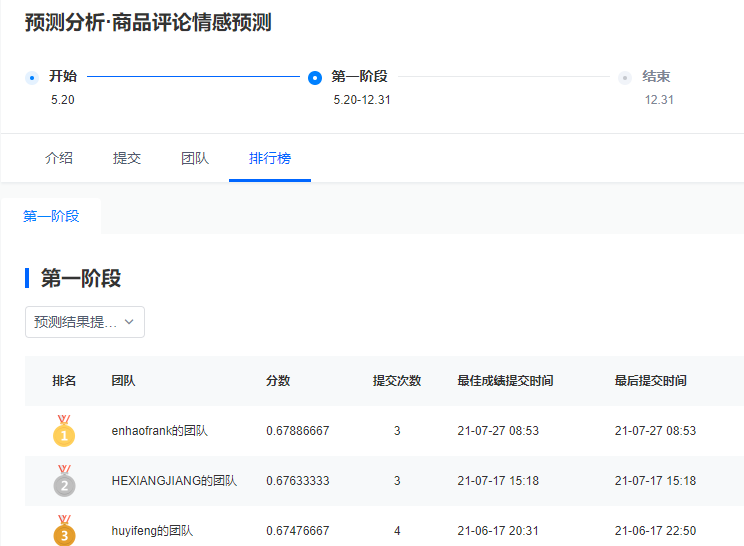